In [1]:
pip install tensorflow keras numpy opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [6]:
train_dir = 'C:/Users/sakth/Downloads/medicalimage/chest_xray/train/'
val_dir = 'C:/Users/sakth/Downloads/medicalimage/chest_xray/val/'
test_dir = 'C:/Users/sakth/Downloads/medicalimage/chest_xray/test/'
CATEGORIES = ['NORMAL', 'PNEUMONIA']


In [7]:
def load_images(data_dir):
    images = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        print(f"Checking directory: {path}")
        class_num = CATEGORIES.index(category)
        for img_file in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, img_file), cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (150, 150))  
                images.append(img)
                labels.append(class_num)
            except Exception as e:
                print(f'Error loading image {img_file}: {e}')
    return np.array(images), np.array(labels)

In [8]:
train_images, train_labels = load_images(train_dir)
val_images, val_labels = load_images(val_dir)
test_images, test_labels = load_images(test_dir)

train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = np.reshape(train_images, (-1, 150, 150, 1))
val_images = np.reshape(val_images, (-1, 150, 150, 1))
test_images = np.reshape(test_images, (-1, 150, 150, 1))


Checking directory: C:/Users/sakth/Downloads/medicalimage/chest_xray/train/NORMAL
Checking directory: C:/Users/sakth/Downloads/medicalimage/chest_xray/train/PNEUMONIA
Checking directory: C:/Users/sakth/Downloads/medicalimage/chest_xray/val/NORMAL
Checking directory: C:/Users/sakth/Downloads/medicalimage/chest_xray/val/PNEUMONIA
Checking directory: C:/Users/sakth/Downloads/medicalimage/chest_xray/test/NORMAL
Checking directory: C:/Users/sakth/Downloads/medicalimage/chest_xray/test/PNEUMONIA


In [9]:
model = Sequential()
model.add(Input(shape=(150, 150, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(CATEGORIES), activation='softmax'))


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels,validation_data=(val_images, val_labels),epochs=10,batch_size=32)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 489ms/step - accuracy: 0.8054 - loss: 0.5509 - val_accuracy: 0.6875 - val_loss: 0.8710
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 462ms/step - accuracy: 0.9444 - loss: 0.1436 - val_accuracy: 0.6875 - val_loss: 0.6625
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 449ms/step - accuracy: 0.9643 - loss: 0.1051 - val_accuracy: 0.7500 - val_loss: 0.5970
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 444ms/step - accuracy: 0.9722 - loss: 0.0841 - val_accuracy: 0.9375 - val_loss: 0.1929
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 453ms/step - accuracy: 0.9747 - loss: 0.0724 - val_accuracy: 0.8750 - val_loss: 0.2112
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 448ms/step - accuracy: 0.9808 - loss: 0.0577 - val_accuracy: 1.0000 - val_loss: 0.0911
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 463ms/step - accuracy: 0.9824 - loss: 0.0518 - val_accuracy: 0.9375 - val_loss: 0.1304
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 454ms/step - accuracy: 0.9817 - loss: 0

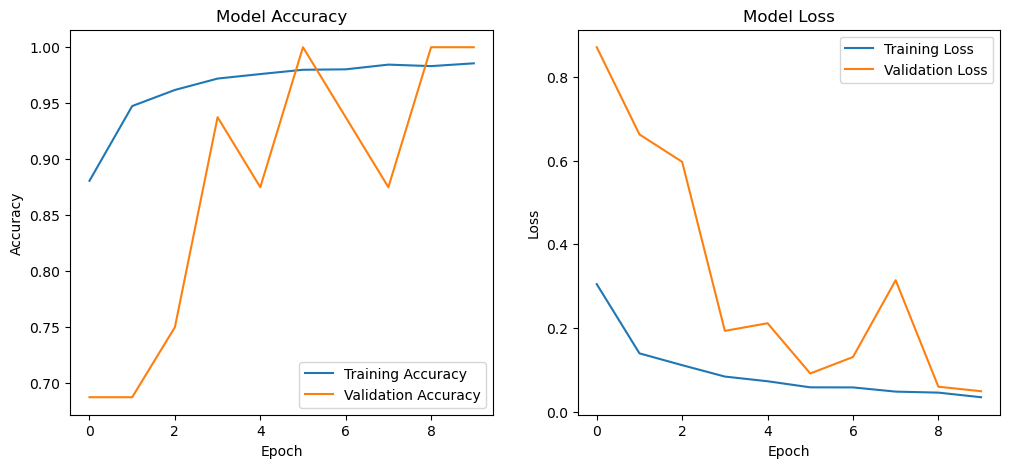

In [15]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [40]:
def loading_preprossing(path):
    img_list = []
    for img_path in os.listdir(path):
        img = cv2.imread(path+'/'+img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(255,255))
        img = img /255
        img_list.append(img)
    return img_list

In [42]:
train_class1 = loading_preprossing('C:/Users/sakth/Downloads/medicalimage/chest_xray/train/NORMAL')
train_class2 = loading_preprossing('C:/Users/sakth/Downloads/medicalimage/chest_xray/train/PNEUMONIA')

In [43]:
train_labels = [0]*len(train_class1) + [1] * len(train_class2)
train_list = train_class1 + train_class2

In [44]:
print("length of train data")
print("length of data is ",len(train_list))
print("length of labels is ",len(train_labels))

length of train data
length of data is  5216
length of labels is  5216


In [45]:
test_class1 = loading_preprossing('C:/Users/sakth/Downloads/medicalimage/chest_xray/test/NORMAL')
test_class2 = loading_preprossing('C:/Users/sakth/Downloads/medicalimage/chest_xray/test/PNEUMONIA')

In [46]:
test_labels = [0]*len(test_class1) + [1] * len(test_class2)
test_list = test_class1 + test_class2
print("length of test data")
print("length of data is ",len(test_list))
print("length of labels is ",len(test_labels))

length of test data
length of data is  624
length of labels is  624


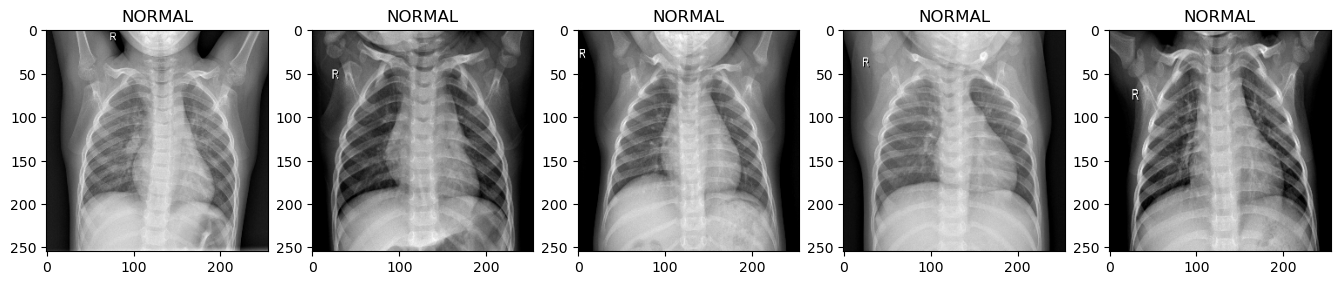

In [47]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[:5], train_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

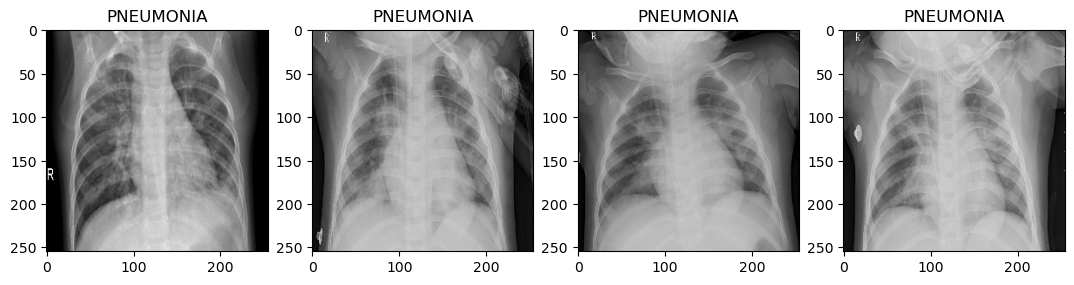

In [48]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[-5:-1], train_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

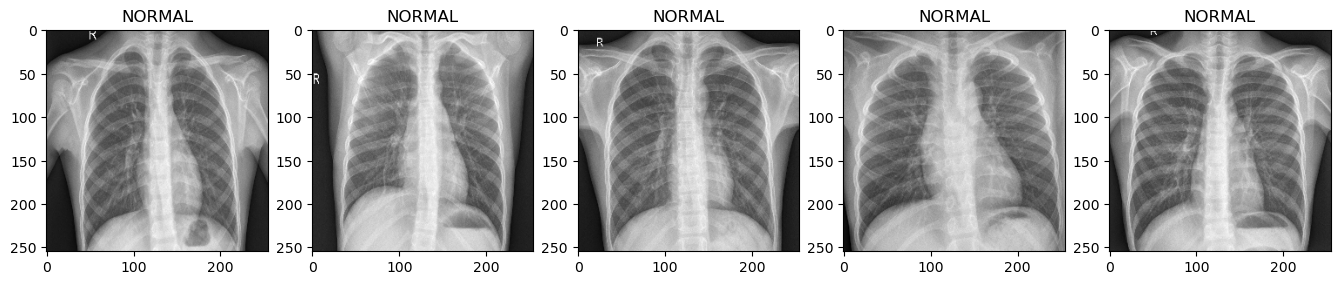

In [49]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[:5], test_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

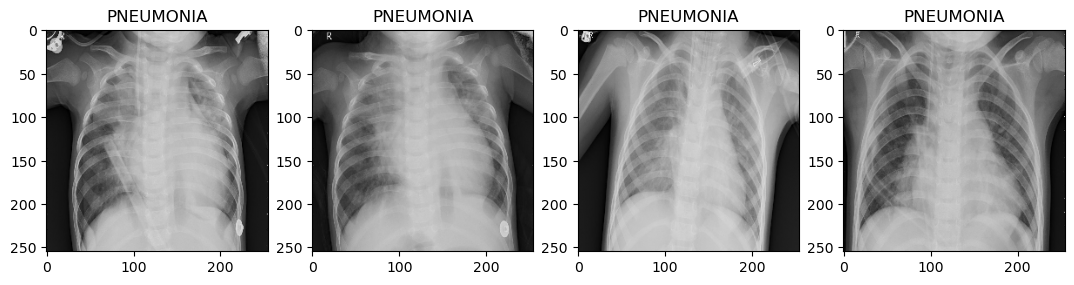

In [50]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], test_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

In [61]:
import tensorflow as tf
from tensorflow.keras import models , layers ,utils

In [68]:
import cv2

# Example to resize the images in the list
train_list_resized = [cv2.resize(img, (128, 128)) for img in train_list]
test_list_resized = [cv2.resize(img, (128, 128)) for img in test_list]

# Now convert to numpy arrays
X_train = np.array(train_list_resized)
X_test = np.array(test_list_resized)


In [70]:
y_train = utils.to_categorical(train_labels,num_classes = 2)
y_test = utils.to_categorical(test_labels,num_classes = 2)
y_train.shape
y_test.shape

(624, 2)

In [72]:
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu',input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(16,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

C:\Users\sakth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,055,234 (4.03 MB)

 Trainable params: 1,055,234 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 35s 152ms/step - accuracy: 0.8224 - loss: 0.4041 - val_accuracy: 0.7292 - val_loss: 0.9218
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.9597 - loss: 0.1049 - val_accuracy: 0.7468 - val_loss: 0.9478
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.9722 - loss: 0.0768 - val_accuracy: 0.7340 - val_loss: 1.3511
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.9748 - loss: 0.0712 - val_accuracy: 0.7436 - val_loss: 0.9080
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.9753 - loss: 0.0634 - val_accuracy: 0.7051 - val_loss: 1.6035
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.9807 - loss: 0.0517 - val_accuracy: 0.7580 - val_loss: 1.1681
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.9872 - loss: 0.0357 - val_accuracy: 0.7131 - val_loss: 1.7881
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.9871 - loss: 0

In [77]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

In [91]:
print(f'Accuracy : {accuracy:.2f}')
print(f'Precision : {precision:.2f}')
print(f'Recall : {recall:.2f}')
print(f'F1 Score : {f1:.2f}')

Accuracy : 0.74
Precision : 0.71
Recall : 0.99
F1 Score : 0.83


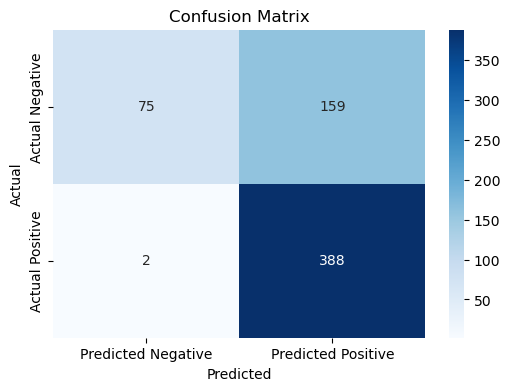

In [83]:
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual ')
plt.title('Confusion Matrix')
plt.show()

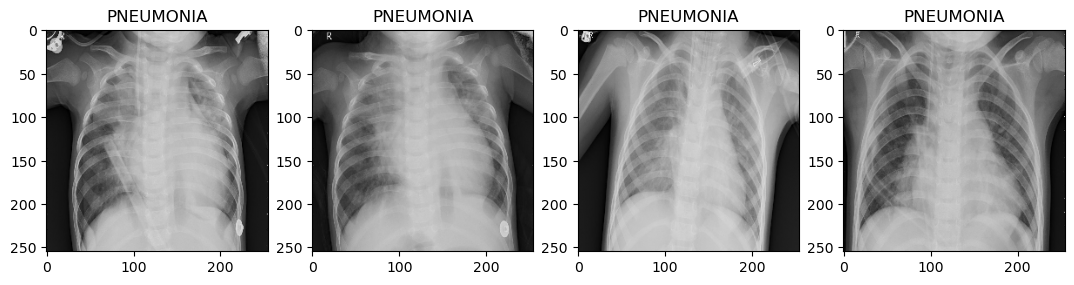

In [85]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], y_pred[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)


In [89]:
model.save('my_model.keras')